In [2]:
import dtree as dt
import monkdata as md
import drawtree_qt5 as draw

In [5]:
m1 = md.monk1
m2 = md.monk2
m3 = md.monk3
monk = [m1, m2, m3]
monk_t = [md.monk1test, md.monk2test, md.monk3test]

In [5]:
print(dtree.entropy(md.monk1))
print(dtree.entropy(md.monk1test))
print(dtree.entropy(md.monk2))
print(dtree.entropy(md.monk2test))
print(dtree.entropy(md.monk3))
print(dtree.entropy(md.monk3test))

1.0
1.0
0.957117428264771
0.9135964672699597
0.9998061328047111
0.9977724720899821


In [22]:
for i in range(3):
    print("monk" , i+1 , ":")
    for j in range(6):
        print(dt.averageGain(monk[i], md.attributes[j]))

monk 1 :
0.07527255560831925
0.005838429962909286
0.00470756661729721
0.02631169650768228
0.28703074971578435
0.0007578557158638421
monk 2 :
0.0037561773775118823
0.0024584986660830532
0.0010561477158920196
0.015664247292643818
0.01727717693791797
0.006247622236881467
monk 3 :
0.007120868396071844
0.29373617350838865
0.0008311140445336207
0.002891817288654397
0.25591172461972755
0.007077026074097326


In [28]:
for i in range(3):
    best = dt.bestAttribute(monk[i], md.attributes)
    print("MONK-" , i + 1 )
    for v in best.values:
        subset = dt.select(monk[i], best, v)
        print("value = ", v ," : " , dt.entropy(subset) , " " ,100 * len(subset) / len(monk[i]),"%")

MONK- 1
value =  1  :  0.0   23.387096774193548 %
value =  2  :  0.9383153522334069   25.0 %
value =  3  :  0.9480782435939054   24.193548387096776 %
value =  4  :  0.9081783472997051   27.419354838709676 %
MONK- 2
value =  1  :  0.9103480624345153   25.443786982248522 %
value =  2  :  1.0   23.668639053254438 %
value =  3  :  0.9633355456726842   28.994082840236686 %
value =  4  :  0.8779620013943912   21.893491124260354 %
MONK- 3
value =  1  :  0.9182958340544896   31.9672131147541 %
value =  2  :  0.8296071030882032   34.42622950819672 %
value =  3  :  0.37764632137370036   33.60655737704918 %


In [32]:
tree = []
for i in range(3):
    tree.append(dt.buildTree(monk[i], md.attributes))
    train_c = dt.check(tree[i], monk[i])
    test_c = dt.check(tree[i], monk_t[i])
    print("train correct rate:",train_c)
    print("test correct rate:",test_c)

train correct rate: 1.0
test correct rate: 0.8287037037037037
train correct rate: 1.0
test correct rate: 0.6921296296296297
train correct rate: 1.0
test correct rate: 0.9444444444444444


In [40]:
draw.drawTree(tree[0])

SystemExit: 0

In [37]:
draw.drawTree(tree[1])

SystemExit: 0

In [38]:
draw.drawTree(tree[2])

SystemExit: 0

In [11]:
fractions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

In [1]:
import random
def partition(data, fraction): 
    ldata = list(data) 
    random.shuffle(ldata) 
    breakPoint = int(len(ldata) * fraction) 
    return ldata[:breakPoint], ldata[breakPoint:]

In [23]:
def pruning(monk, test, itr , fractions):
    pruning_err = [None]*len(fractions)
    for i in range(len(fractions)):
        pruning_err[i] = [None]*itr
    count = 0
    for ft in fractions:
        for i in range(itr):
            data_tr, data_va = partition(monk, ft)
            tree_tr = dt.buildTree(data_tr, md.attributes)
            train_correct = dt.check(tree_tr, data_va)
            best_correct = train_correct
            best_pruning = tree_tr
            trees = dt.allPruned(tree_tr)
            for tree in trees:
                valid_correct = dt.check(tree, data_va)
                if(valid_correct > train_correct):
                    best_correct = valid_correct
                    best_pruning = tree
            new_correct = dt.check(best_pruning, test)
            pruning_err[count][i] = 1 - new_correct
        count += 1
    return pruning_err

In [28]:
def evaluate(err):
    erravgs = []
    errvars = []
    for i in range(len(err)):
        erravg = 0
        for j in range(len(err[i])):
            erravg += (err[i][j]) / len(err[i])
        erravgs.append(round(erravg,5))
    
    for i in range(len(err)):
        errvar = 0
        for j in range(len(err[i])):
            errvar += pow(err[i][j] - erravgs[i],2) / len(err[i])
        errvars.append(round(errvar,5))
    return erravgs , errvars

In [24]:
err = pruning(monk[0], monk_t[0], 500 , fractions)

In [30]:
err1 = err

In [34]:
avg1, var1 = evaluate(err1)
print(avg1)
print(var1)

[0.23631, 0.21218, 0.18897, 0.16412, 0.15232, 0.1399]
[0.00225, 0.00222, 0.00229, 0.0023, 0.00248, 0.00225]


In [31]:
err2 = pruning(monk[2], monk_t[2], 500 , fractions)

In [35]:
avg2, var2 = evaluate(err2)
print(avg2)
print(var2)

[0.09786, 0.07324, 0.06218, 0.05319, 0.05172, 0.04888]
[0.00395, 0.00195, 0.00137, 0.00085, 0.0007, 0.00048]


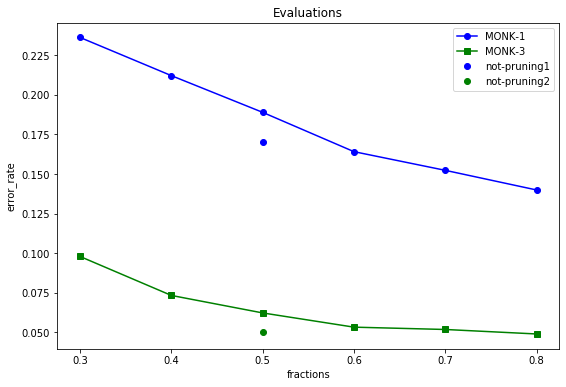

In [41]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(9, 6))
ax1 = fig.add_subplot(111)
ax1.plot(fractions, avg1, c='b', marker="o", label="MONK-1")
ax1.plot(fractions, avg2, c='g', marker="s", label="MONK-3")
plt.plot(0.5,0.17,'bo',label="not-pruning1")
plt.plot(0.5,0.05,'go',label="not-pruning2")
ax1.set_title("Evaluations")
ax1.set_xlabel("fractions")
ax1.set_ylabel("error_rate")
plt.legend(loc='upper right')

In [ ]:
plt.savefig("err_evaluations.png")